In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [157]:
train = pd.read_csv(r"/Users/pranayrastogi/Downloads/train_loanprediction.csv")
test = pd.read_csv(r"/Users/pranayrastogi/Downloads/test_loanprediction.csv")

The data can be downloaded from the Analytics Vidhya hackathon page: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [158]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [160]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [161]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [162]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [165]:
train_original = train.copy()
test_original = test.copy()

In [166]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

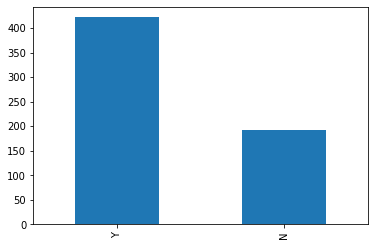

In [167]:
train['Loan_Status'].value_counts().plot(kind='bar')

In [168]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [169]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

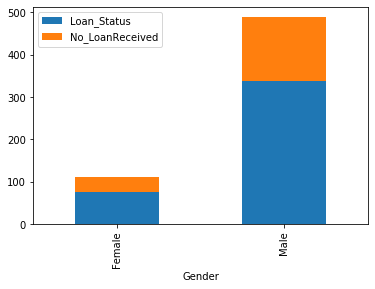

In [170]:
train['Loan_Status'] = train['Loan_Status'].map({"Y":1,"N":0})
train['No_LoanReceived'] = 1 - train['Loan_Status']
train.groupby('Gender').agg('sum')[['Loan_Status','No_LoanReceived']].plot(kind='bar',stacked=True)

In [171]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [172]:
train.groupby('Gender').agg('sum')[['Loan_Status','No_LoanReceived']]

,Loan_Status,No_LoanReceived
Gender,,
Female,75,37
Male,339,150


So we can conclude that the number of male applicants in our training data set is more than the number of female applicants and the chances of getting a loan to the males and females is quite high. So gender is an important feature to consider in our model.

In [173]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [174]:
train[train.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,No_LoanReceived
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1,0
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1,0
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1,0


In [175]:
pd.crosstab(train.Gender,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [176]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
No_LoanReceived        int64
dtype: object

In [177]:
train.describe(include=['int','float','object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,No_LoanReceived
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614.000000,614.000000
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,LP001811,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN,NaN
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,0.687296,0.312704
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,0.463973,0.463973
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,1.000000,1.000000


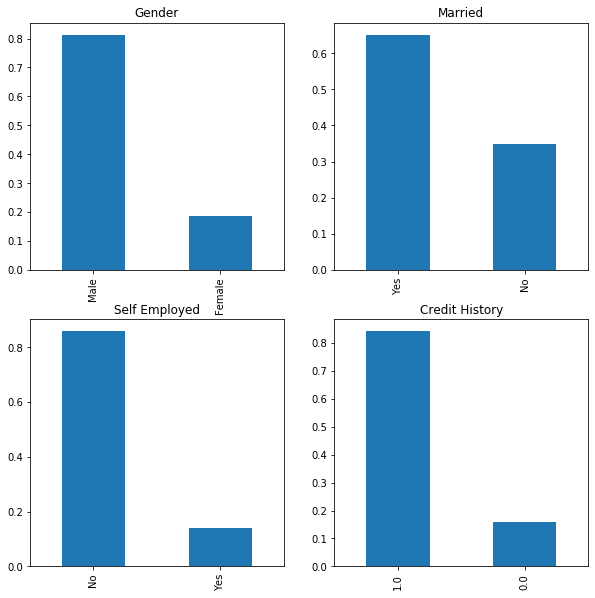

In [178]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10), title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10),title="Self Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10),title="Credit History")

In [179]:
print(train.Self_Employed.value_counts(normalize=True))
print(train.Gender.value_counts(normalize=True))
print(train.Credit_History.value_counts(normalize=True))
print(train.Married.value_counts(normalize=True))

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


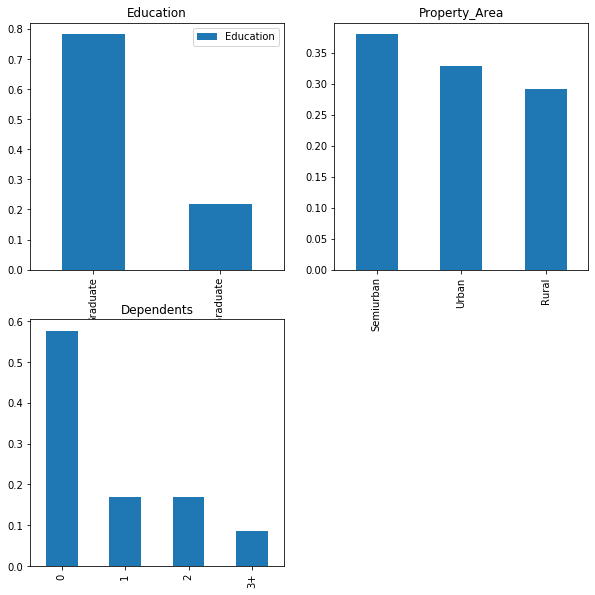

In [180]:
plt.figure(1)
plt.subplot(221)
train['Education'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10), title= 'Education',legend=True)
plt.subplot(222)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10), title= 'Property_Area')
plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot(kind='bar',figsize=(10,10),title="Dependents")

In [181]:
pd.crosstab(train.Education,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [182]:
import seaborn as sns

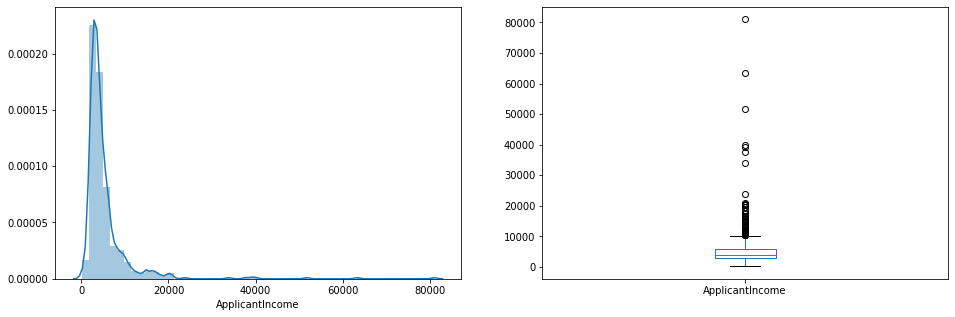

In [183]:
plt.figure(figsize=(15,15))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

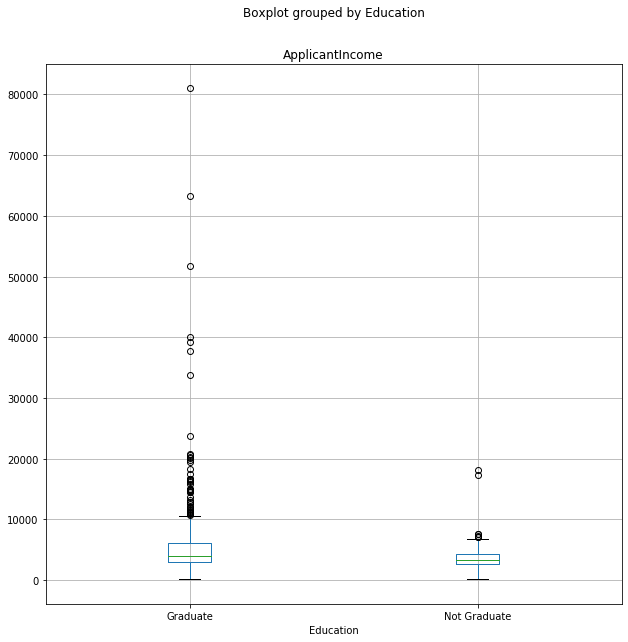

In [184]:
train.boxplot(column='ApplicantIncome',by='Education',figsize=(10,10))

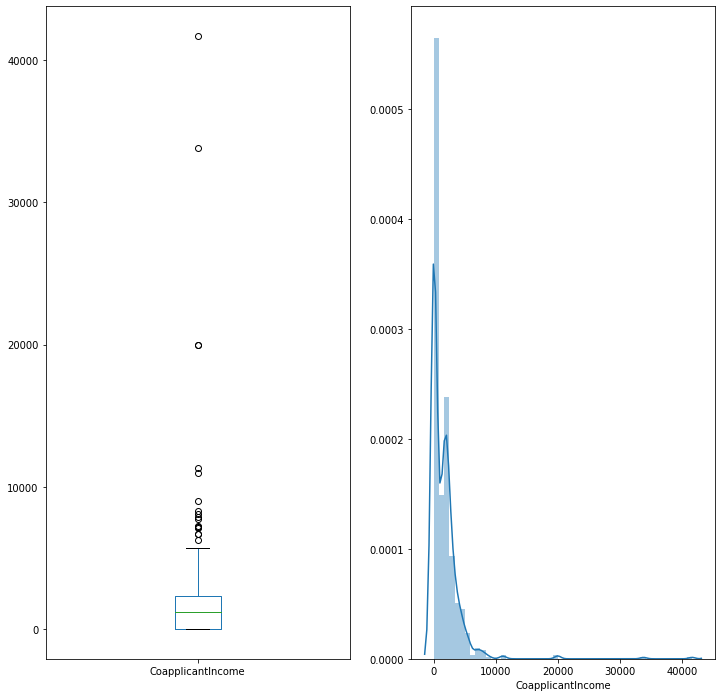

In [185]:
plt.figure(figsize=(12,12))
plt.subplot(121)
train['CoapplicantIncome'].plot.box()
plt.subplot(122)
sns.distplot(train['CoapplicantIncome'])

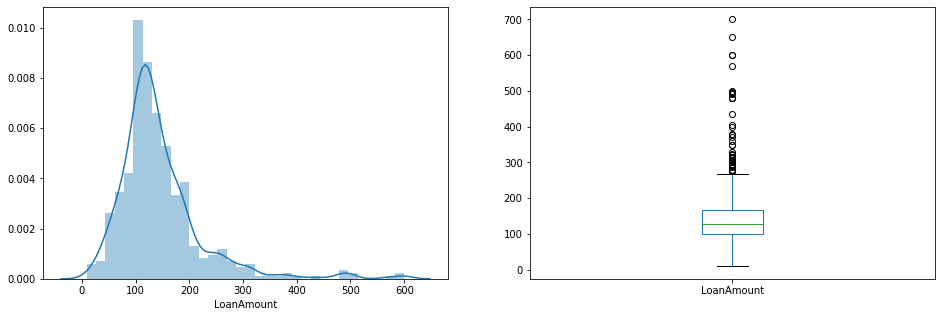

In [186]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna()
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

# Bivariate Analysis

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


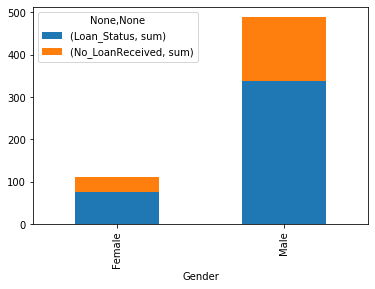

In [187]:
train.groupby('Gender').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  #Loan_Status No_LoanReceived
pd.crosstab(train.Gender,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


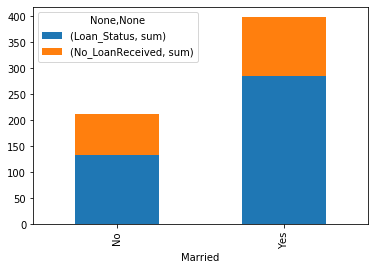

In [188]:
train.groupby('Married').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  #Loan_Status No_LoanReceived
pd.crosstab(train.Married,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


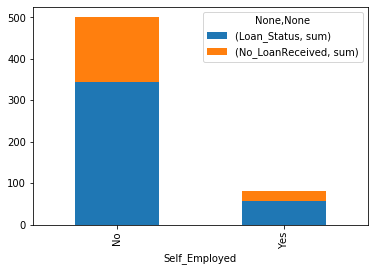

In [189]:
train.groupby('Self_Employed').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  #Loan_Status No_LoanReceived
pd.crosstab(train.Self_Employed,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


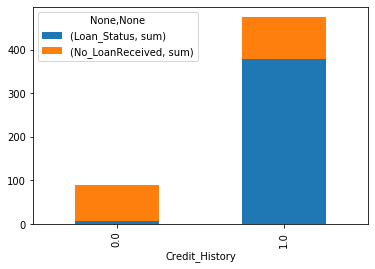

In [190]:
train.groupby('Credit_History').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  #Loan_Status No_LoanReceived
pd.crosstab(train.Credit_History,train.Loan_Status,margins=True)

In [191]:
##Bivariate Analysis for Numerical and Categorical features

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


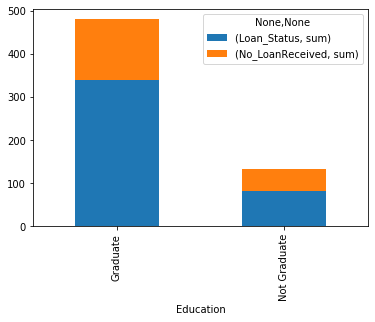

In [192]:
train.groupby('Education').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.Education,train.Loan_Status,margins=True)

Loan_Status,0,1,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


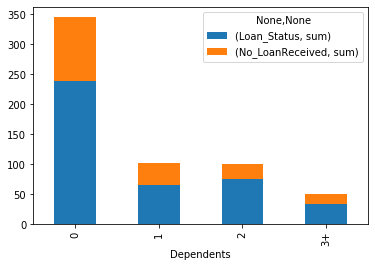

In [193]:
train.groupby('Dependents').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.Dependents,train.Loan_Status,margins=True)

Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416
All,0.312704,0.687296


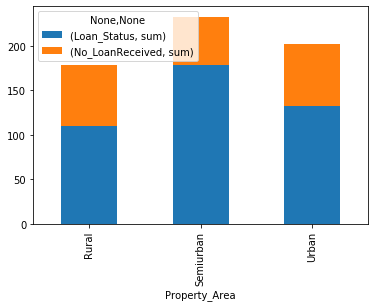

In [194]:
train.groupby('Property_Area').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.Property_Area,train.Loan_Status,margins=True,normalize='index')

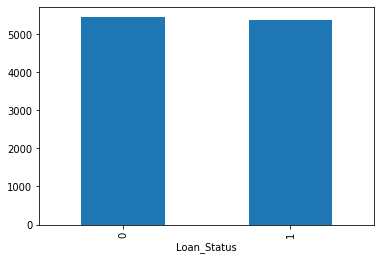

In [195]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [196]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,No_LoanReceived,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,High


Loan_Status,0,1
Income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very high,0.335766,0.664234
All,0.312704,0.687296


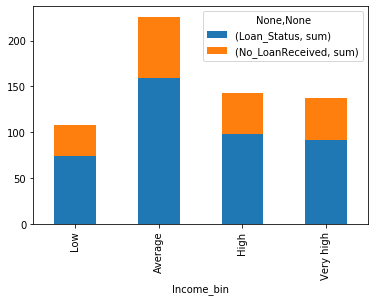

In [197]:
train.groupby('Income_bin').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.Income_bin,train.Loan_Status,margins=True,normalize='index')

In [198]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,No_LoanReceived,Income_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0,High,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,High,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0,Average,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0,High,6000.0,High


Loan_Status,0,1
Total_Income_bin,,
Low,0.583333,0.416667
Average,0.268908,0.731092
High,0.290179,0.709821
Very high,0.327935,0.672065
All,0.312704,0.687296


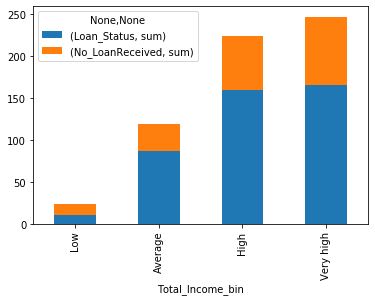

In [199]:
train.groupby('Total_Income_bin').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.Total_Income_bin,train.Loan_Status,margins=True,normalize='index')

In [200]:
# Analyzing the Loan Amount variable
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

Loan_Status,0,1
LoanAmount_bin,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500
All,0.305743,0.694257


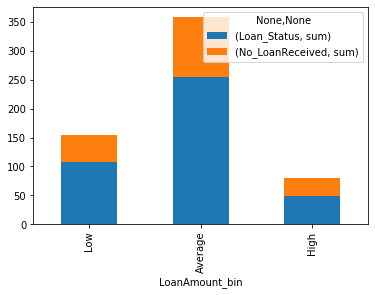

In [201]:
train.groupby('LoanAmount_bin').agg(['sum'])[['Loan_Status' ,'No_LoanReceived']].plot(kind='bar',stacked=True)  
pd.crosstab(train.LoanAmount_bin,train.Loan_Status,margins=True,normalize='index')

In [202]:
train=train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

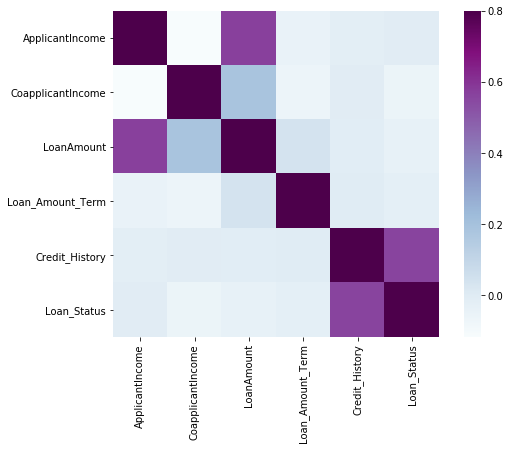

In [203]:
train.drop('No_LoanReceived',axis=1,inplace=True)
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Adding Missing Values

In [204]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [205]:
train.loc[train['Married'].isnull(),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1


In [206]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [207]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [208]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [209]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [211]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

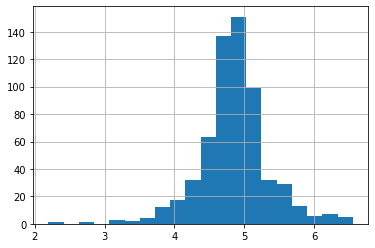

In [212]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [213]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [214]:
y = train.Loan_Status
X = train.drop('Loan_Status',1) 

In [215]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [216]:
edu_dummies = pd.get_dummies(train['Education'],prefix="Education")
train = pd.concat([train, edu_dummies], axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Education_Graduate,Education_Not Graduate
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,1,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,1,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,1,0


In [217]:
train.drop('Education', inplace=True, axis=1)

In [218]:
edu_dummies_test = pd.get_dummies(test['Education'],prefix="Education")
test = pd.concat([test, edu_dummies_test], axis=1)
test.drop('Education', inplace=True, axis=1)

In [219]:
train.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Education_Graduate,Education_Not Graduate
0,Male,No,0,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,1,0
1,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,1,0
2,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,1,0
3,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,0,1
4,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,1,0


In [220]:
gender_dummies = pd.get_dummies(train['Gender'],prefix="Gender")
train = pd.concat([train, gender_dummies], axis=1)
train.drop('Gender', inplace=True, axis=1)
gender_dummies_test = pd.get_dummies(test['Gender'],prefix="Gender")
test = pd.concat([test, gender_dummies_test], axis=1)
test.drop('Gender', inplace=True, axis=1)
test.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male
0,Yes,0,No,5720,0,110.0,360.0,1.0,Urban,4.700480,1,0,0,1
1,Yes,1,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,1,0,0,1
2,Yes,2,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,1,0,0,1
3,Yes,2,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,1,0,0,1
4,No,0,No,3276,0,78.0,360.0,1.0,Urban,4.356709,0,1,0,1


In [221]:
married_dummies = pd.get_dummies(train['Married'],prefix="Married")
train = pd.concat([train, married_dummies], axis=1)
train.drop('Married', inplace=True, axis=1)
married_dummies_test = pd.get_dummies(test['Married'],prefix="Married")
test = pd.concat([test, married_dummies_test], axis=1)
test.drop('Married', inplace=True, axis=1)
test.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0,No,5720,0,110.0,360.0,1.0,Urban,4.700480,1,0,0,1,0,1
1,1,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,1,0,0,1,0,1
2,2,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,1,0,0,1,0,1
3,2,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,1,0,0,1,0,1
4,0,No,3276,0,78.0,360.0,1.0,Urban,4.356709,0,1,0,1,1,0


In [222]:
proparea_dummies = pd.get_dummies(train['Property_Area'],prefix="Property_Area")
train = pd.concat([train, proparea_dummies], axis=1)
train.drop('Property_Area', inplace=True, axis=1)
proparea_dummies_test = pd.get_dummies(test['Property_Area'],prefix="Property_Area")
test = pd.concat([test, proparea_dummies_test], axis=1)
test.drop('Property_Area', inplace=True, axis=1)
test.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,No,5720,0,110.0,360.0,1.0,4.700480,1,0,0,1,0,1,0,0,1
1,1,No,3076,1500,126.0,360.0,1.0,4.836282,1,0,0,1,0,1,0,0,1
2,2,No,5000,1800,208.0,360.0,1.0,5.337538,1,0,0,1,0,1,0,0,1
3,2,No,2340,2546,100.0,360.0,1.0,4.605170,1,0,0,1,0,1,0,0,1
4,0,No,3276,0,78.0,360.0,1.0,4.356709,0,1,0,1,1,0,0,0,1


In [223]:
train.drop('Self_Employed',axis=1,inplace=True)
test.drop('Self_Employed',axis=1,inplace=True)

In [224]:
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,4.852030,1,0,0,1,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,4.852030,1,0,0,1,0,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,4.189655,1,0,0,1,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,4.948760,1,0,0,1,1,0,0,0,1


In [225]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Education_Graduate', 'Education_Not Graduate', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [226]:
Xt = train[['Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'Education_Graduate', 'Education_Not Graduate', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(Xt,y, test_size =0.3)

In [227]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
X_test = X_test[['Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'Education_Graduate', 'Education_Not Graduate', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
pred_test = model.predict(X_test)

In [229]:
accuracy_score(y_test,pred_test)

0.8216216216216217

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

pipe_steps = [('gbclf',GradientBoostingClassifier())]

pipeline = Pipeline(pipe_steps)
params = {'gbclf__max_depth':[2,3,4],'gbclf__n_estimators':[50,100]}
grid = GridSearchCV(pipeline,param_grid = params,cv=5,scoring='roc_auc')
grid.fit(X_train,y_train)
grid.best_params_

{'gbclf__max_depth': 2, 'gbclf__n_estimators': 100}

In [237]:
grid.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1])

Text(0.5, 1.0, 'ROC curve for our Logistic Regression Model')

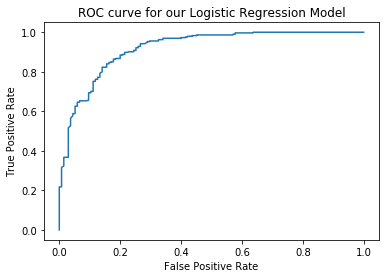

In [239]:
from sklearn import metrics
proba = grid.predict_proba(X_train)
# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(y_train.values,proba[:,1])
# print(fpr)
# print(tpr)
plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for our Logistic Regression Model")